In [54]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
dataframe = pd.read_csv("Downloads/Zomato_data .csv")

In [56]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [57]:
# def handle_rate(value):
#     value=str(value).split('/')
#     value=value[0];
#     return float(value)

# dataframe['rate']=dataframe['rate'].apply(handle_rate)
# dataframe['rate']



def handleRate(value):
    value=str(value).split('/')
    value1=value[0];
    return value1
 
dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table rate  votes  \
0                  Jalsa          Yes        Yes  4.1    775   
1         Spice Elephant          Yes         No  4.1    787   
2        San Churro Cafe          Yes         No  3.8    918   
3  Addhuri Udupi Bhojana           No         No  3.7     88   
4          Grand Village           No         No  3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [58]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

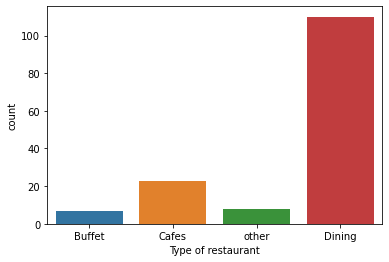

In [59]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel('Type of restaurant')

Text(0, 0.5, 'Votes')

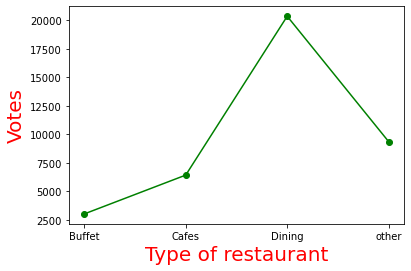

In [60]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
grouped_data
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel('Type of restaurant',c='red',size=20)
plt.ylabel('Votes',c='red',size=20)

In [61]:
grouped_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

In [62]:
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


In [63]:
#restaurant’s name that received the maximum votes
max_votes=dataframe['votes'].max()
max_votes

4884

In [64]:
restaurant_with_max_votes=dataframe.loc[dataframe['votes']==max_votes,'name']
restaurant_with_max_votes

38    Empire Restaurant
Name: name, dtype: object

<AxesSubplot:xlabel='online_order', ylabel='count'>

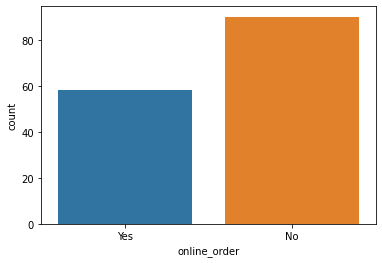

In [65]:
sns.countplot(x=dataframe['online_order'])

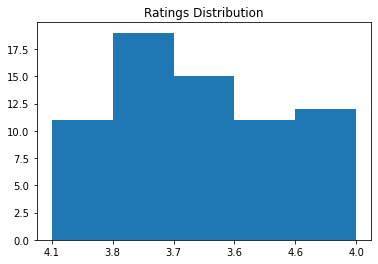

In [66]:
#exploring rating column
plt.hist(dataframe['rate'],bins=5,range=(0,5))
plt.title('Ratings Distribution')
plt.show()

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

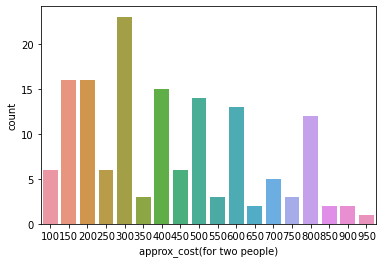

In [67]:
sns.countplot(x=dataframe['approx_cost(for two people)'])

<AxesSubplot:xlabel='online_order_num', ylabel='rate'>

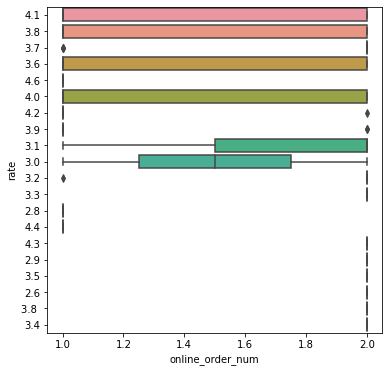

In [68]:
#check online orders receive higher ratings than offline orders.

#convert non numeric data to numeric data
online_order_map={'Yes':1,'No':2}
dataframe['online_order_num']=dataframe['online_order'].map(online_order_map)
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order_num', y = 'rate', data = dataframe)

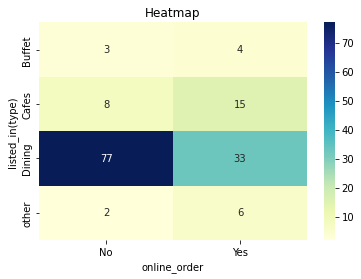

In [69]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size', fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title('Heatmap')
plt.show()